In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import sympy as senpai
from sympy import Heaviside
from sympy import print_latex

In [2]:
df = pd.read_csv("KORONA.TXT", skiprows=20, header=None, delimiter="\t")
df

,0,1,2,3,4,5
0,NaN,0.9,mV,DC,01:27:04pm,231.0
1,NaN,0.9,mV,DC,01:27:09pm,231.0
2,NaN,0.9,mV,DC,01:27:14pm,231.0
3,NaN,0.9,mV,DC,01:27:19pm,231.0
4,NaN,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...,...
476,NaN,18.9,mV,DC,02:06:44pm,51.0
477,NaN,18.9,mV,DC,02:06:49pm,51.0
478,NaN,18.9,mV,DC,02:06:54pm,51.0
479,NaN,18.9,mV,DC,02:06:59pm,51.0


In [3]:
df = df.drop(0, 1)
df = df[:-1]
df

,1,2,3,4,5
0,0.9,mV,DC,01:27:04pm,231.0
1,0.9,mV,DC,01:27:09pm,231.0
2,0.9,mV,DC,01:27:14pm,231.0
3,0.9,mV,DC,01:27:19pm,231.0
4,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...
475,19.0,mV,DC,02:06:39pm,50.0
476,18.9,mV,DC,02:06:44pm,51.0
477,18.9,mV,DC,02:06:49pm,51.0
478,18.9,mV,DC,02:06:54pm,51.0


In [4]:
df.rename(columns={1:'Value', 2:'Unit', 3:'Current', 4:'Time', 5:'Nwm'}, inplace=True)
df

,Value,Unit,Current,Time,Nwm
0,0.9,mV,DC,01:27:04pm,231.0
1,0.9,mV,DC,01:27:09pm,231.0
2,0.9,mV,DC,01:27:14pm,231.0
3,0.9,mV,DC,01:27:19pm,231.0
4,0.8,mV,DC,01:27:24pm,232.0
...,...,...,...,...,...
475,19.0,mV,DC,02:06:39pm,50.0
476,18.9,mV,DC,02:06:44pm,51.0
477,18.9,mV,DC,02:06:49pm,51.0
478,18.9,mV,DC,02:06:54pm,51.0


In [5]:
mV = df["Value"].to_numpy()

# Metoda Kumpmullera

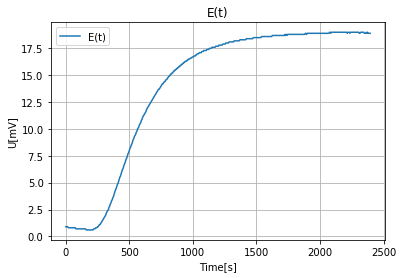

In [6]:
x = np.arange(0, len(mV)*5, 5)

plt.plot(x, mV, label="E(t)")
plt.grid(True)
plt.xlabel("Time[s]")
plt.ylabel("U[mV]")
plt.title("E(t)")
plt.legend()
plt.savefig("oryginal.png", dpi=300)
plt.show()

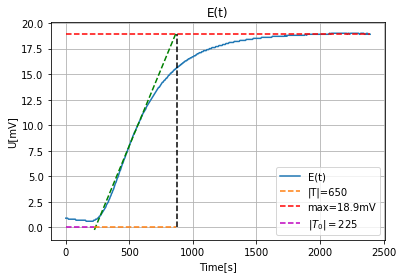

In [7]:
plt.plot(x, mV, label="E(t)")
plt.grid(True)
plt.xlabel("Time[s]")
plt.ylabel("U[mV]")
plt.title("E(t)")
plt.plot(x[45:175], 0.03*x[45:175]-7, 'g--')
plt.plot(x[45:175], 0*x[45:175], 'C1--', label="|T|="+str(x[175]-x[45]))
plt.plot(x, 18.9*np.ones(len(x)), 'r--',label="max=18.9mV")
plt.plot(x[0:45],np.zeros(len(x[0:45])), 'm--', label="$|T_{0}|=$"+str(x[45]))
plt.plot([x[175], x[175]], [0, 18.9], 'k--')
plt.legend()
plt.savefig("oryginal_z_kreskami.png", dpi=300)
plt.show()

In [8]:
y_kumpf = np.array([0.900000000000000,0.900000000000000,0.900000000000000,0.900000000000000,0.900000000000000,1.99349112426035,3.31189141729039,4.53267688055276,5.66307495099583,6.70977794354840,7.67898267174570,8.57642713482992,9.40742448852481,10.1768945006019,10.8893926774652,11.5491372341936,12.1600340677111,12.7256998809347,13.2494835948027,13.7344861749478,14.1835789903970,
14.5994208129863,14.9844735581331,15.3410168601557,15.6711615684312,15.9768622442931,16.2599287326537,16.5220368768602,16.7647384402182,16.9894702929224,17.1975629187840,17.3902482921163,17.5686671714135,17.7338758530020,17.8868524246505,18.0285025561587,18.1596648612102,18.2811158622312,18.3935745876494,18.4977068287702,18.5941290814724,18.6834121960591,18.7660847568728,18.8426362116818,18.9135197693664,18.9791550830592,19.0399307346246,19.0962065351864,19.1483156553243,19.1965665975489,19.2412450227341])
x_sim = np.arange(0, 2550, 50)

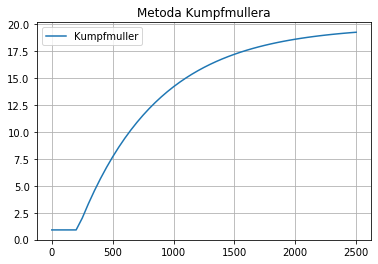

In [9]:
plt.plot(x_sim, y_kumpf, label="Kumpfmuller")
plt.grid(True)
plt.legend()
plt.title("Metoda Kumpfmullera")
plt.savefig("metoda_kumpfmullera.png", dpi=300)
plt.show()

# Metoda Strejca

$T_{m}=T_{0}=225$  
$T_{z}=T=650$  
$k=18.9$  

In [10]:
T_m = 225
T_z = 650
k = 18.9

$\left\{\frac{T_{m}}{T_{z}}\right\}$

In [11]:
T_m/T_z

0.34615384615384615

In [12]:
n = 4

$\tau = 
\left[
    \left(
        \frac{T_{m}}{T_{z}}
        -
        \frac{T_{m}}{T_{z}}
    \right)
\right]
\cdot
T_{z}$

In [13]:
tau = (T_m/T_z-0.319)*T_z
tau

17.64999999999999

In [14]:
ti = 0.319*T_z
ti

207.35

In [15]:
y_st = np.array([0,0,0.0155100571140054,0.0922780185233200,0.267197386660905,0.567951405710831,1.00828861976817,1.58830652657253,2.29703652653156,3.11576917261724,4.02128099155503,4.98856620567264,5.99293631307695,7.01149371215603,8.02405644821081,9.01363869673237,9.96659450039985,10.8725223609153,11.7240127806537,12.5163039820286,13.2468951122140,
13.9151523764429,14.5219321227667,15.0692359029675,15.5599057234165,15.9973627499068,16.3853892961056,16.7279516804866,17.0290601948302,17.2926617482254,17.5225605395175,17.7223622158950,17.8954372796619,18.0448999232892,18.1735989429662,18.2841178605681,18.3787818452547,18.4596694517590,18.5286275736005,18.5872883423349,18.6370869886174,18.6792799198178,18.7149624660953,18.7450859068380,18.7704735170460,18.7918354733270,18.8097825361236,18.8248384826264,18.8374513071119,18.8480032352553,18.8568196189362
])
y_st = y_st+0.9

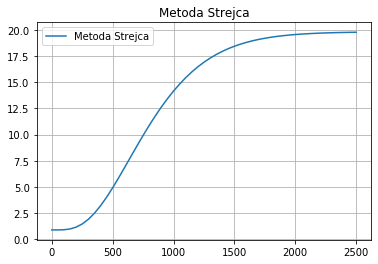

In [16]:
plt.plot(x_sim, y_st, label="Metoda Strejca")
plt.grid(True)
plt.legend()
plt.title("Metoda Strejca")
plt.savefig("metoda_strejca.png", dpi=300)
plt.show()

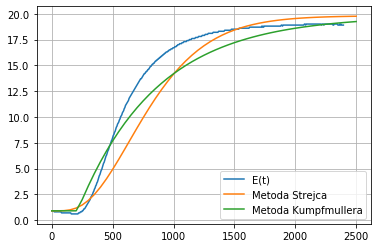

In [17]:
plt.plot(x, mV, label="E(t)")
plt.plot(x_sim, y_st, label="Metoda Strejca")
plt.plot(x_sim, y_kumpf, label="Metoda Kumpfmullera")
plt.grid(True)
plt.legend()
plt.title("")
plt.savefig("metoda_porownanie.png", dpi=300)
plt.show()